In [1]:
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#生成stopword表，需要去除一些否定词和程度词汇
stopwords = set()
fr = open('./stopwords.txt','r',encoding='utf-8')
for word in fr:
	stopwords.add(word.strip())#Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
#读取否定词文件
not_word_file = open('./notDict.txt','r+',encoding='utf-8')
not_word_list = not_word_file.readlines()
not_word_list = [w.strip() for w in not_word_list]
#读取程度副词文件
degree_file = open('./degreeDict.txt','r+',encoding='utf-8')
degree_list = degree_file.readlines()
degree_list = [item.split(',')[0] for item in degree_list]
#生成新的停用词表
with open('stopwords_new.txt','w',encoding='utf-8') as f:
	for word in stopwords:
		if(word not in not_word_list) and (word not in degree_list):
			f.write(word+'\n')

In [3]:
#jieba分词后去除停用词
import jieba
def seg_word(sentence):
	seg_list = jieba.cut(sentence)
	seg_result = []
	for i in seg_list:
		seg_result.append(i)
	stopwords = set()
	with open('stopwords.txt','r',encoding='utf-8') as fr:
		for i in fr:
			stopwords.add(i.strip())
	return list(filter(lambda x :x not in stopwords,seg_result))

In [4]:
#找出文本中的情感词、否定词和程度副词
from collections import defaultdict
def classify_words(word_list):
	#读取情感词典文件
	sen_file = open('./BosonNLP_sentiment_score.txt','r+',encoding='utf-8')
	#获取词典文件内容
	sen_list = sen_file.readlines()
	#创建情感字典
	sen_dict = defaultdict()
	#读取词典每一行的内容，将其转换成字典对象，key为情感词，value为其对应的权重
	for i in sen_list:       
		sen_dict[i.split(' ')[0]] = i.split(' ')[1]
	#读取否定词文件
	not_word_file = open('notDict.txt','r+',encoding='utf-8')
	not_word_list = not_word_file.readlines()
	#读取程度副词文件
	degree_file = open('degreeDict.txt','r+',encoding='utf-8')
	degree_list = degree_file.readlines()
	degree_dict = defaultdict()
	for i in degree_list:
		degree_dict[i.split(',')[0]] = i.split(',')[1]
	sen_word = dict()
	not_word = dict()
	degree_word = dict()
	#分类
	for i in range(len(word_list)):
		word = word_list[i]
		if word in sen_dict.keys() and word not in not_word_list and word not in degree_dict.keys():
			# 找出分词结果中在情感字典中的词
			sen_word[i] = sen_dict[word]
		elif word in not_word_list and word not in degree_dict.keys():
			# 分词结果中在否定词列表中的词
			not_word[i] = -1
		elif word in degree_dict.keys():
			# 分词结果中在程度副词中的词
			degree_word[i]  = degree_dict[word]
	#关闭打开的文件
	sen_file.close()
	not_word_file.close()
	degree_file.close()
	#返回分类结果
	return sen_word,not_word,degree_word

In [5]:
#计算情感词的分数
def score_sentiment(sen_word,not_word,degree_word,seg_result):
	#权重初始化为1
	W = 1
	score = 0
	#情感词下标初始化
	sentiment_index = -1
	#情感词的位置下标集合
	sentiment_index_list = list(sen_word.keys())
	#遍历分词结果
	for i in range(0,len(seg_result)):
		#如果是情感词
		if i in sen_word.keys():
			#权重*情感词得分
			score += W*float(sen_word[i])
			#情感词下标加一，获取下一个情感词的位置
			sentiment_index += 1
			if sentiment_index < len(sentiment_index_list)-1:
				#判断当前的情感词与下一个情感词之间是否有程度副词或否定词
				for j in range(sentiment_index_list[sentiment_index],sentiment_index_list[sentiment_index+1]):
					#更新权重，如果有否定词，权重取反
					if j in not_word.keys():
						W *= -1
					elif j in degree_word.keys():
						W *= float(degree_word[j])
		#定位到下一个情感词
		if sentiment_index < len(sentiment_index_list)-1:
			i = sentiment_index_list[sentiment_index+1]
	return score

In [6]:
def sentiment_score(sentence):
	print(sentence)
	#1.对文档分词
	seg_list = seg_word(sentence)
	#2.将分词结果转换成字典，找出情感词、否定词和程度副词
	sen_word,not_word,degree_word = classify_words(seg_list)
	#3.计算得分
	score = score_sentiment(sen_word,not_word,degree_word,seg_list)
	return score

In [7]:
import pandas as pd
data = pd.read_csv('./bullet9.csv', encoding='utf-8')

In [8]:
import datetime
a=datetime.datetime.now()
data = data.head(1000)
data["score"] = data["content"].apply(sentiment_score)#这里为了让广播效果客观，特意设置了输出打印到控制台
b=datetime.datetime.now()
print(b-a) #计算“广播“所花费的时间 这里以1000条数据为例,花费2分09秒；bullet9.csv中有近30万条数据，“广播”完毕花费近12个小时
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Seeumt\AppData\Local\Temp\jieba.cache


30年，牙都掉了，不是拔的


Loading model cost 0.590 seconds.
Prefix dict has been built successfully.


哇宝马耶
一模一样
you should be dancing ~HAHA
？？？？？？
这是标准的熊抱
？？？
快去请光头强!
哈哈哈哈哈哈哈哈我变色了
糟糕的台词，好快的车车
孤独无助
哈哈哈哈哈哈哈哈哈哈哈哈哈
别让等待，成为遗憾
前排提醒这个熊有牙。
熊吃的也太好了8
哈哈哈哈哈哈哈哈哈哈哈哈
挺可爱的哈哈哈哈哈
活的不如熊
是你吗幺妹鑫鑫
毛妹太好看了
一家人伺候祖宗
这伙食…家里有矿
巨熊伊万的力量
摩尔曼斯克终年不冻港
它怎么好像没牙齿啊
莫斯科
可爱
我的妈呀
666
哈哈哈哈哈哈哈哈
弹幕呢
哈哈哈哈哈啊哈哈啊哈
名场面
片头极度舒适
土拨鼠的感觉
大制作开头
舌头好灵活
哈哈哈哈哈哈
熊养活了这一家
无中生友
哈哈哈哈哈哈哈哈哈哈哈哈哈
最危险的还是熊掌
吃的比我都好
233
神偷奶爸第一步最后那个跳舞的bgm！
发个友善的弹幕见证当下
小潘？金莲？
哈哈哈
啊啊啊爱了
吓我一跳
胆子大
真泰迪熊
我没有熊生活得好5555
哈哈哈哈哈哈哈哈哈
眼睫毛好可爱~
吸吸~~~~
666666
6666，不愧是战斗民族
上来就撸熊，啊哈哈哈哈哈哈哈
哈哈哈哈哈哈哈哈
这样一张照片够我吹一辈子
大户人家大户人家
这吃的每天的花多少钱
熊:蒜香的？
一天能吃几十斤的东西
睡熊盲醒
济南话哈哈哈哈哈哈哈
哈哈哈哈哈哈哈哈哈哈哈哈
瑞思拜！！
大片及视角
哈哈哈哈
战斗民族的朋友
熊的力量
ufc的小鹰
哈哈哈哈哈哈哈哈
硬核吃播节目
超可爱的说
？？？？？？？？？？？？
哈哈哈哈哈哈哈哈哈哈哈哈哈
虎扑来的有吗
墨西哥可还行哈哈哈哈
乌拉
改素食了
人不如熊
大户人家
感觉叔好可怜啊
啊啊啊666
巨婴熊
无中生又
厉害
哈哈哈哈哈
垮掉
没点家底谁养的了熊……
人不如熊
哇
食贫道NB
想摸
什么？叫limbo？
终究是一个熊抗下了所有
片头！！！！！！！
B889HT197）
好害怕(✪▽✪)
吃的比我好太多了
色熊
它...
有牙的
抱着我的大熊猫不说话
怎么解决生理需要
闭不上嘴
够盗月㊓吹一辈子了
还拍照
我说咋拿着大蒜呢，原来是考虑到了幺妹鑫鑫
我好像听懂了一句你好
真熊啊。。。可以养么，不犯法么
这真的是熊生巅峰啊～
这真的是熊生巅峰啊～
利爪德鲁伊
熊好像拔牙了啊
蒜不就是生吃吗。。
真。熊抱
磨剪子来呛菜刀！
米莎
对比强烈啊
于谦他爸爸的那

熊：哎呀，头一回吃中餐，得老实点
我觉得仿佛在看特效
这是真熊孩子
开头的毛妹呢？？
实际上怪可爱的(///▽///)
除非包吃包住
养我可以吗
ypa
浪老师请求一战
装机猿？
几个人抢着喂
羡慕死我了
他不用担心变胖。。。
岁月是把无尽战刃。
这一顿抵得上我一个月了
0:01:32.973259


,time,content,oid,sender,score
0,2020-03-11,30年，牙都掉了，不是拔的,157845466,cd19f3e7,-0.495720
1,2020-03-11,哇宝马耶,157845466,eaaf79f,2.641685
2,2020-03-11,一模一样,157845466,716cacf3,-0.147181
3,2020-03-11,you should be dancing ~HAHA,157845466,ea911e16,9.362980
4,2020-03-11,？？？？？？,157845466,31eaa455,0.000000


In [9]:
# data.to_csv("./data_1000.csv", encoding='utf_8_sig')
# 将完成“广播”后的数据导出

In [10]:
import pandas as pd
dm = pd.read_csv("./data_all.csv", encoding='utf_8_sig') #这里的 data_all.csv 即当时30万条数据完成“广播”后导出的数据

In [11]:
bv = pd.read_csv("./blibli_videos_new.csv", encoding='utf_8_sig')
bv = bv.rename(columns={'time':'release'})

In [12]:
data = pd.merge(bv,dm)

In [13]:
# data.to_csv("./data_1000.csv", encoding='utf_8_sig')
#将合并之后的数据导出

In [14]:
videoIds = data["oid"].unique()

In [15]:
l1=len(data)
print(u'一共有 %s条评论。' %l1)
data = data.drop_duplicates(subset=['content'],keep='first')
l2=len(data)
print(u'删除了 %s条评论。' %(l1 - l2))

一共有 292225条评论。
删除了 93869条评论。


In [16]:
data= data.drop(index=(data.loc[(data['score']==0.000000)].index))
l3 = len(data)
print(u'删除了 %s条评分为0的数据。' %(l2 - l3))
data = data = data.sample(n=50000, frac=None, replace=False, weights=None, random_state=None, axis=None)

删除了 21800条评分为0的数据。


In [17]:
def make_label(df):
    df["score"] = df["score"].apply(lambda x: 1 if x>0 else 0)

In [18]:
make_label(data)

In [19]:
X = data[['content']]
y = data.score

In [20]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [21]:
X['cutted_content'] = X.content.apply(chinese_word_cut)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file) as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

In [24]:
stopwords = get_custom_stopwords("./stopwordsHIT.txt")

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vect = CountVectorizer()

In [27]:
term_matrix = pd.DataFrame(vect.fit_transform(X_train.cutted_content).toarray(), columns=vect.get_feature_names())

In [28]:
term_matrix.shape

(37500, 22846)

In [29]:
vect = CountVectorizer(stop_words=frozenset(stopwords))

In [30]:
term_matrix = pd.DataFrame(vect.fit_transform(X_train.cutted_content).toarray(), columns=vect.get_feature_names())

In [31]:
term_matrix.shape

(37500, 22664)

In [32]:
term_matrix.head(2)

,00,000,001,003,00am,01,02,03,0317,04,...,龙科技,龙虾,龙门,龙门客栈,龙门石窟,龙骨,龙龙,龟壳,龟苓膏,龟龟
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
max_df = 0.8 # 在超过这一比例的文档中出现的关键词（过于频繁），去除掉。
min_df = 3 # 在低于这一数量的文档中出现的关键词（过于独特），去除掉。

In [34]:
vect = CountVectorizer(max_df = max_df,
                       min_df = min_df,
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b',
                       stop_words=frozenset(stopwords))

In [35]:
term_matrix = pd.DataFrame(vect.fit_transform(X_train.cutted_content).toarray(), columns=vect.get_feature_names())

In [36]:
term_matrix.shape

(37500, 5710)

In [37]:
term_matrix.head(2)

,ai,amp,and,app,are,baby,bb,bbc,be,bei,...,鼻子,鼻孔,鼻毛,鼻涕,龙口,龙族,龙泉,龙虾,龟苓膏,龟龟
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [39]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(vect, nb)

In [40]:
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.8, max_features=None, min_df=3,
                  ngram_range=(1, 1), preprocessor=None,
                  stop_words=frozenset({'"', '#', '&', "'", '(', ')', '*', '+',
                                        ',', '-', '-- ', '. ', '...', '......',
                                        '...................', './', '.一', '.数',
                                        '.日 ', '/', '//', ':', '://', '::', ';',
                                        '<', '=', '>', '?', '? ', ...}),
                  strip_accents=None, token_pattern='(?u)\\b[^\\d\\W]\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train.cutted_content, y_train.astype("int"), cv=5, scoring='accuracy').mean()

0.76256

In [42]:
pipe.fit(X_train.cutted_content,y_train.astype("int"))

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=frozenset({'"', '#', '&', "'", '(',
                                                       ')', '*', '+', ',', '-',
                                                       '-- ', '. ', '...',
                                                       '......',
                                                       '...................',
                                                       './', '.一', '.数', '.日 ',
                                                       '/', '//', ':', '

In [43]:
pipe.predict(X_test.cutted_content)

array([0, 1, 0, ..., 0, 1, 1])

In [44]:
y_pred = pipe.predict(X_test.cutted_content)

In [45]:
test_rec = X_test.iloc[3,:]
pipe.predict([test_rec.cutted_content])

array([1])

In [46]:
from sklearn import metrics

In [47]:
metrics.accuracy_score(y_test.astype("int"),y_pred.astype("int"))

0.77144

In [48]:
data = pd.read_csv("./data_final_1.csv", encoding='utf_8_sig')

In [49]:
from datetime import datetime
data['release'] = pd.to_datetime(data['release']) 
data_index = data.set_index('release')

In [50]:
data_index.sort_index(inplace=True)
data_sort = data_index.truncate(after='2020-7-13')
videoIds = data_sort["oid"].unique()

In [51]:
data_sort.head(2)

,title,aid,oid,Unnamed: 0,time,content,sender,score
release,,,,,,,,
2018-02-24,到北京必吃的涮羊肉火锅，本地人排长队都要吃的店，超火爆！,20005646,32635365,261406,2020-03-15,百万粉了,8fb931c8,3.107178
2018-02-24,到北京必吃的涮羊肉火锅，本地人排长队都要吃的店，超火爆！,20005646,32635365,261368,2020-03-05,考古,3e1ceda5,0.395744


In [52]:
from collections import Counter
def get_count_by_counter(l):
    count = Counter(l)
    count_dict = dict(count)
    return count_dict

In [53]:
def getRate(data,index):
    data['cutted_content'] = data.content.apply(chinese_word_cut)
    array = pipe.predict(data.cutted_content)
    dict = get_count_by_counter(array)
    return 100*dict[index]/len(array)

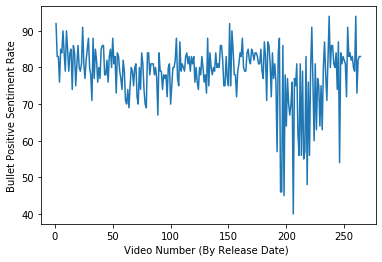

In [54]:
a = []
b = []
targetDf = pd.DataFrame()
for index , videoId in enumerate(videoIds):
    video_data = data_sort[data_sort["oid"].isin([videoId])]
    exec("data%s = video_data"%index)
    a.append(index+1)
#     print(getRate(eval("data"+str(index)),1),index+1)
    b.append(round(getRate(eval("data"+str(index)),1)))
    if round(getRate(eval("data"+str(index)),1))<50:
#         print(video_data.head(1))
          targetDf = pd.concat([targetDf,video_data.head(1)])
import matplotlib.pyplot as plt 
plt.xlabel('Video Number (By Release Date) ')
plt.ylabel('Bullet Positive Sentiment Rate')
plt.plot(a,b)

In [55]:
targetDf

,title,aid,oid,Unnamed: 0,time,content,sender,score,cutted_content
release,,,,,,,,,
2020-01-29,【武汉Vlog】去医院给护士小姐姐送盒饭，她们顾得上吃吗？,85633710,146369620,36832,2020-02-06,这次的病毒毕竟对消化功能有很大的影响嘛，病人有些需要注意的地方也可以理解的,e330a09b,-2.562672,这次 的 病毒 毕竟 对 消化 功能 有 很大 的 影响 嘛 ， 病人 有些 需要 注意 的...
2020-01-29,【武汉Vlog】十几天建一所医院 中国的“基建狂魔”都是超人吗？,85530001,146188861,25501,2020-02-13,辛苦了,2786654b,-0.276181,辛苦 了
2020-02-01,【武汉Vlog】宿舍距离发热门诊仅300米，一线医生是如何轮班休息的？,86101238,147171247,78499,2020-06-22,辛苦了,f9ee4508,-0.276181,辛苦 了
2020-02-11,【武汉vlog】这样的数字胜过千言万语,88202791,150686749,50421,2020-04-04,辛苦了,29dcb176,-0.276181,辛苦 了
2020-03-07,【武汉Vlog】好消息！武汉第三医院的新冠病房关闭了,94478723,161292343,129993,2020-03-09,辛苦了,f46027fe,-0.276181,辛苦 了


In [56]:
data = pd.read_csv("./blibli_videos_new.csv", encoding='utf_8_sig')
data['time'] = pd.to_datetime(data['time']) 
data_index = data.set_index('time')
data_index.sort_index(inplace=True)
data_before = data_index.truncate(after='2020-1-23')
data_after = data_index.truncate(before='2020-1-23')

In [57]:
from pyecharts import Bar
bar = Bar("武汉封城前后发布视频数量", "up主：食贫道")
bar.add("",["封城前", "封城后"],[len(data_before), len(data_after)])
bar

In [58]:
# 数据清洗过程弹幕数量变化
attr =["原始数据", "删除重复数据后", "删除中性情感倾向的弹幕后"]
v =[l1,l2,l3]
from pyecharts import Funnel
funnel = Funnel('弹幕数据量')
funnel.add('', attr, v, is_label_show=True, label_pos='inside', label_text_color="#fff")
funnel

In [59]:
#若使用SnowNLP计算情感得分
from snownlp import SnowNLP
def get_snowlp_sentiment(text):
    return SnowNLP(text).sentiments

In [60]:
y_pred_snownlp = X_test.content.apply(get_snowlp_sentiment)

In [61]:
y_pred_snownlp_normalized = y_pred_snownlp.apply(lambda x: 1 if x>0.5 else 0)

In [62]:
metrics.accuracy_score(y_test.astype("int"), y_pred_snownlp_normalized)

0.6024